In [2]:
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
train = pd.read_csv('./data/X_train.csv')
train

,Unnamed: 0,age,gender,i_0,i_1,i_2,i_3,i_4,i_5,i_6,...,v6_4990,v6_4991,v6_4992,v6_4993,v6_4994,v6_4995,v6_4996,v6_4997,v6_4998,v6_4999
0,50735778,60,1,-59.0,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,...,109.0,114.0,119.0,124.0,129.0,134.0,147.0,172.0,200.0,143.0
1,50691683,82,0,-39.0,-38.0,-38.0,-38.0,-38.0,-38.0,-38.0,...,199.0,229.0,259.0,289.0,319.0,349.0,379.0,409.0,439.0,302.0
2,50757706,59,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,-38.0,-11.0,-2.0
3,50527435,81,0,108.0,106.0,93.0,79.0,86.0,74.0,64.0,...,91.0,81.0,89.0,79.0,59.0,61.0,64.0,49.0,26.0,10.0
4,1102626291,30,1,363.0,366.0,366.0,353.0,334.0,314.0,306.0,...,-74.0,-61.0,-59.0,-86.0,-66.0,-71.0,-91.0,-84.0,-11.0,-4.0
5,51302990,58,1,0.0,-3.0,-8.0,-13.0,-16.0,-17.0,-18.0,...,-258.0,-258.0,-258.0,-258.0,-258.0,-258.0,-258.0,-258.0,-171.0,-56.0
6,50527370,54,0,-9.0,6.0,-31.0,-27.0,16.0,17.0,14.0,...,-39.0,-44.0,-39.0,-49.0,-41.0,-44.0,-39.0,-36.0,-9.0,1.0
7,50313826,46,1,-179.0,-178.0,-178.0,-178.0,-178.0,-178.0,-178.0,...,119.0,119.0,119.0,119.0,119.0,119.0,119.0,79.0,26.0,8.0
8,50488810,47,0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,...,-198.0,-198.0,-198.0,-198.0,-198.0,-198.0,-198.0,-198.0,-131.0,-42.0
9,50338332,61,0,-139.0,-143.0,-148.0,-153.0,-156.0,-157.0,-158.0,...,644.0,641.0,640.0,639.0,639.0,639.0,639.0,639.0,426.0,141.0


In [4]:
id_ =  0
data_dict = {}
data_row = train.loc[id_][3:]
for i in range(12):
    key = data_row.index[i*5000].split('_')[0]
    data_dict[key] = data_row[i*5000: 5000*(i+1)]
    data_dict[key].name = key
    data_dict[key]

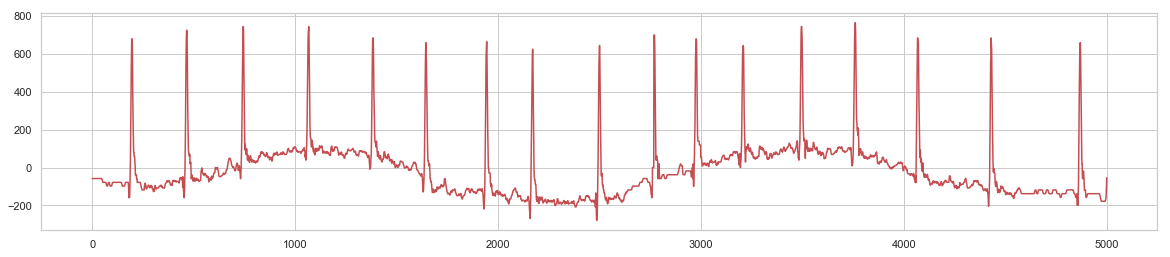

In [5]:
#sns.set(rc={'figure.figsize':(20,4), 'color':'r'})
#sns.lineplot(data=data_dict['i'][:1000], palette = sns.xkcd_rgb["pale red"])
plt.figure(figsize=(20,4))
plt.plot(range(5000), data_dict['i'].values, color ='r')
pass